"""<br>
    @Author: Deven Gupta<br>
    @Date: 03-10-2024<br>
    @Last Modified by: Deven Gupta<br>
    @Last Modified time: 03-10-2024<br>
    @Title : Python Program for Multinomial logistic Regression practice<br>
<br>
"""

# Importing Libraies

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading dataset

In [10]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Adding the target variable


# Spliting dataset in Train and Test data

In [11]:
# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation and Fitting

In [13]:
# Create the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Fit the model
model.fit(X_train, y_train)

c:\Users\Deven\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

# Checking model Prediction

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluating Performance of model

In [15]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Visualization

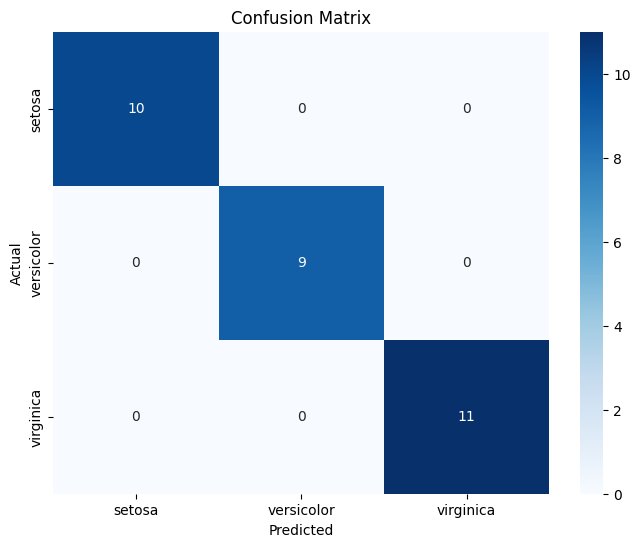

In [16]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


c:\Users\Deven\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Deven\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


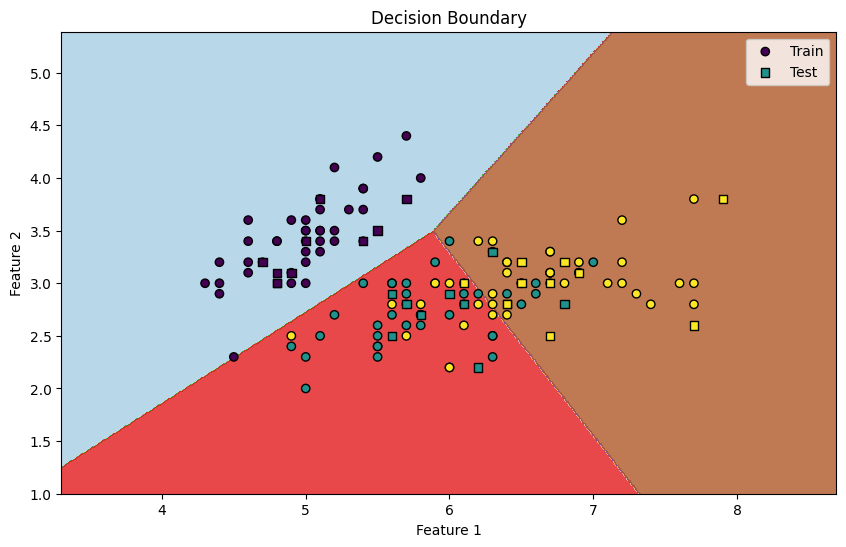

In [17]:
# Plot Decision Boundaries
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

model_2d = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model_2d.fit(X_train_2d, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for each point in the mesh grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Paired')
plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c=y_train, edgecolors='k', marker='o', label='Train')
plt.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], c=y_test, edgecolors='k', marker='s', label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.show()


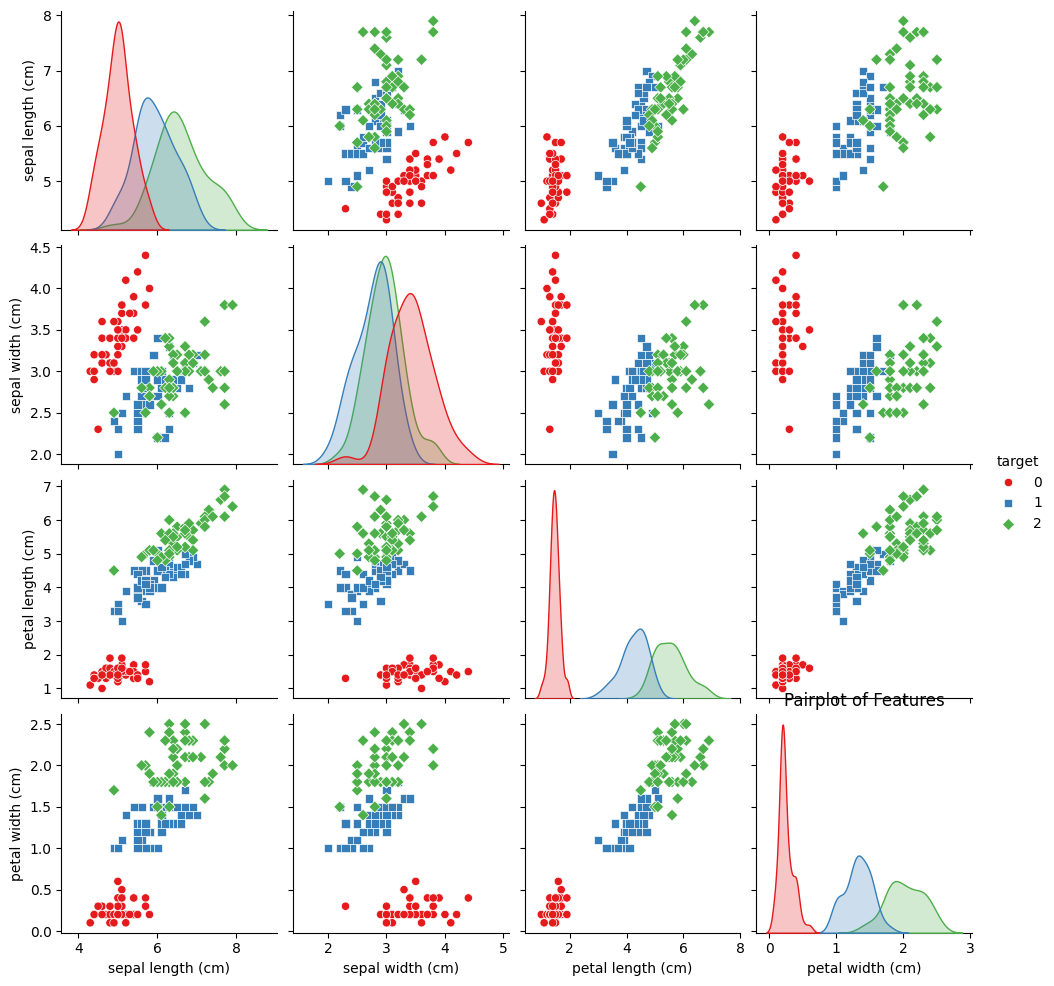

In [18]:
# Pairplot
sns.pairplot(df, hue='target', palette='Set1', markers=["o", "s", "D"])
plt.title('Pairplot of Features')
plt.show()
